In [1]:
from core.simulation import Simulation
import numpy as np

In [2]:
sim = Simulation()
sim.simulate()

{'dt_backbone': 'C:\\Users\\gusta\\Desktop\\simroel-py-v3\\data\\topologies\\dt_backbone.txt', 'nsfnet': 'C:\\Users\\gusta\\Desktop\\simroel-py-v3\\data\\topologies\\nsfnet.txt', 'ring4': 'C:\\Users\\gusta\\Desktop\\simroel-py-v3\\data\\topologies\\ring4.txt', 'ring8': 'C:\\Users\\gusta\\Desktop\\simroel-py-v3\\data\\topologies\\ring8.txt', 'test': 'C:\\Users\\gusta\\Desktop\\simroel-py-v3\\data\\topologies\\test.txt'}
C:\Users\gusta\Desktop\simroel-py-v3\data\parameters.json


Simulation #1: 100%|██████████| 100000/100000 [34:45<00:00, 47.94it/s]

BREAK!


In [3]:
sim.stats.summarize()


        [*] Total connections handled: 100000
        [*] Total connections allocated: 39298 (39.30%)
        ********* BLOCKED (+) *********
        [-] Resource: 60702 (60.7020%)
        [-] OSNR: 0 (0.0000%)
        [-] XT: 0 (0.0000%)
        ********** DEBUG (+) **********
        [+] Total: 100000
        


In [4]:
fiber_debug = sim.fiber.fiber_debug

In [5]:
list(fiber_debug.keys())[:5]

[(0, 1), (1, 0), (1, 2), (2, 1), (2, 3)]

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

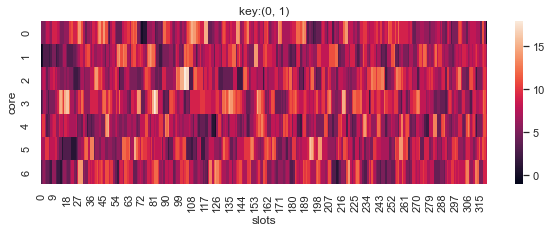

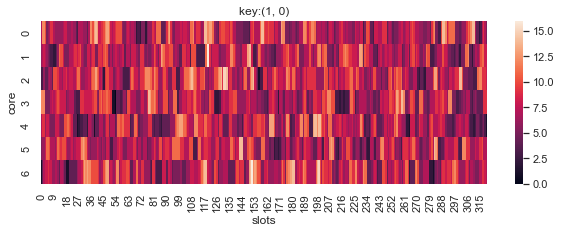

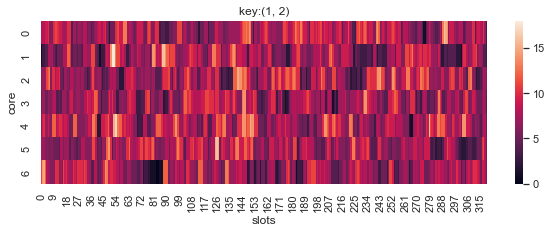

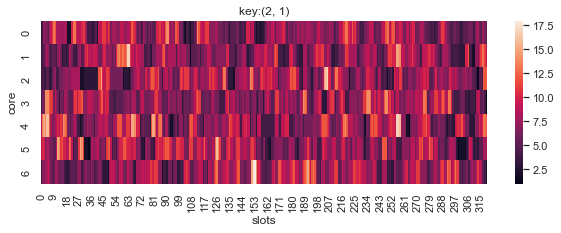

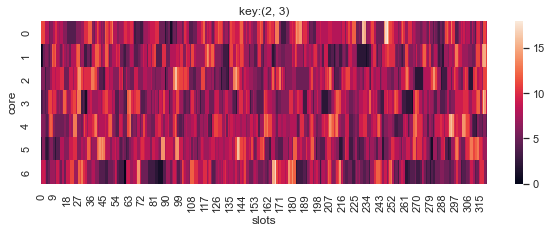

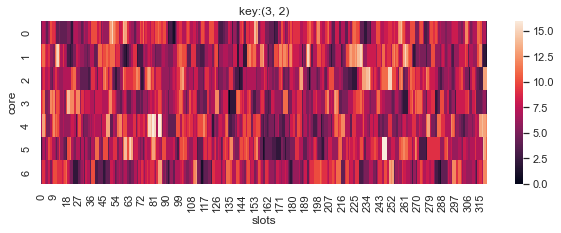

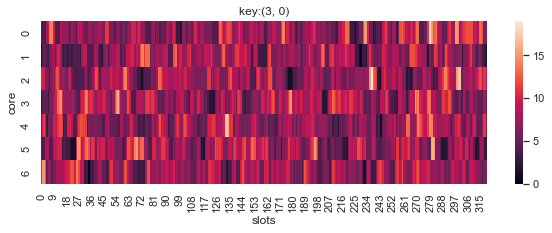

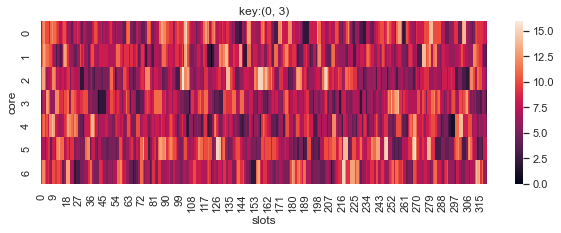

In [7]:
for k in list(fiber_debug.keys()):
    plt.figure(figsize=(10, 3))
    plt.title(f"key:{k}")
    
    sns.heatmap(fiber_debug.get(k))
    
    plt.xlabel("slots")
    plt.ylabel("core")

## **Profiling**

In [1]:
from core.simulation import Simulation
import numpy as np
import cProfile, pstats, io

In [2]:
sim = Simulation()

pr = cProfile.Profile()
pr.enable()
sim.simulate()
pr.disable()
s = io.StringIO()
ps = pstats.Stats(pr, stream=s).sort_stats("cumulative")
ps.print_stats()
print(s.getvalue())

{'dt_backbone': 'C:\\Users\\gusta\\Desktop\\simroel-py-v3\\data\\topologies\\dt_backbone.txt', 'nsfnet': 'C:\\Users\\gusta\\Desktop\\simroel-py-v3\\data\\topologies\\nsfnet.txt', 'ring4': 'C:\\Users\\gusta\\Desktop\\simroel-py-v3\\data\\topologies\\ring4.txt', 'ring8': 'C:\\Users\\gusta\\Desktop\\simroel-py-v3\\data\\topologies\\ring8.txt', 'test': 'C:\\Users\\gusta\\Desktop\\simroel-py-v3\\data\\topologies\\test.txt'}
C:\Users\gusta\Desktop\simroel-py-v3\data\parameters.json


Simulation #1: 100%|██████████| 5000/5000 [04:10<00:00, 20.00it/s]

BREAK!
         130371059 function calls (130286711 primitive calls) in 250.034 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000  250.033  125.017 c:\users\gusta\desktop\compilador\lib\site-packages\IPython\core\interactiveshell.py:3325(run_code)
      9/2    0.000    0.000  250.033  125.017 {built-in method builtins.exec}
        1    0.000    0.000  250.033  250.033 C:\Users\gusta\AppData\Local\Temp\ipykernel_19332\2674366171.py:5(<cell line: 5>)
        1    0.110    0.110  250.033  250.033 C:\Users\gusta\Desktop\simroel-py-v3\core\simulation.py:65(simulate)
     8497    0.098    0.000  231.166    0.027 C:\Users\gusta\Desktop\simroel-py-v3\core\simulation.py:147(fes_control)
     5000    0.357    0.000  207.466    0.041 C:\Users\gusta\Desktop\simroel-py-v3\core\pce.py:22(process)
    28287    0.156    0.000  204.823    0.007 C:\Users\gusta\Desktop\simroel-py-v3\utils\assignment.py:46(alloc)
 

In [ ]:
ps.dump_stats(filename="needs_profiling.prof")

In [ ]:
!snakeviz ./needs_profiling.prof

**problema esta na alocacao -> random_fit, alloc, all**


**problema esta no fes -> nsmallest, get/remove/compare_min**

In [ ]:
sim.stats.summarize()

In [6]:
!snakeviz ./needs_profiling.prof

^C


**problema esta na alocacao -> random_fit, alloc, all**


**problema esta no fes -> nsmallest, get/remove/compare_min**

In [3]:
sim.stats.summarize()


        [*] Total connections handled: 10000
        [*] Total connections allocated: 5210 (52.10%)
        ********* BLOCKED (+) *********
        [-] Resource: 4790 (47.9000%)
        [-] OSNR: 0 (0.0000%)
        [-] XT: 0 (0.0000%)
        ********** DEBUG (+) **********
        [+] Total: 10000
        
